In [165]:
import pandas as pd
file_path = '/content/drive/MyDrive/01 Week 1: Python/sales_predictions (2).csv'
df = pd.read_csv(file_path)

In [166]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [167]:
len(df), len(df.columns)

(8523, 12)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [169]:
df.duplicated().sum()

0

In [170]:
df.isnull().sum().sort_values(ascending=False)/len(df)

Outlet_Size                  0.282764
Item_Weight                  0.171653
Item_Identifier              0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [171]:
df['Item_Weight'].min(),df['Item_Weight'].max(),df['Item_Weight'].mean()

(4.555, 21.35, 12.857645184136183)

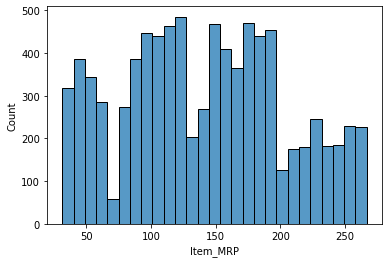

In [172]:
from seaborn.distributions import histplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x='Item_MRP');

This indicates that the greater amount of middle range MRP, possibly reflecting a greater number of sales of middle ITEM MRP with a few upticks in high or low end MRP products.

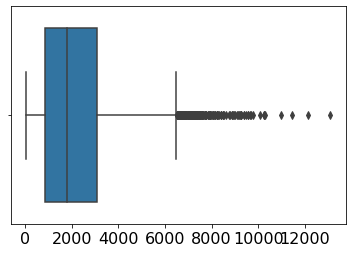

In [173]:
sns.boxplot(data=df, x='Item_Outlet_Sales');

plt.xlabel('', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

This indicates a higher average of sales tend to be in the 2000s range but has a large set of outliers in the higher ranges.

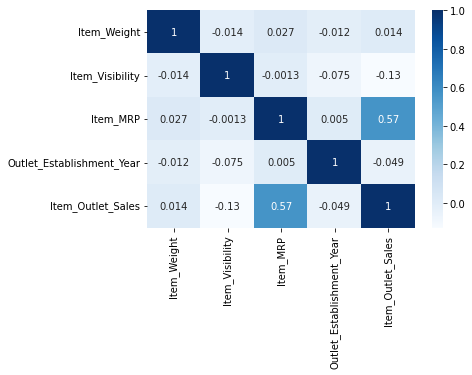

In [174]:
corr = df.corr()
sns.heatmap(corr,cmap='Blues',annot=True);

This shows a moderate correlation between MRP and SALES, which indicate that the sales are favorable with mid-range MRP products. 

Now, does Item MRP or Item Visibility affect sales?

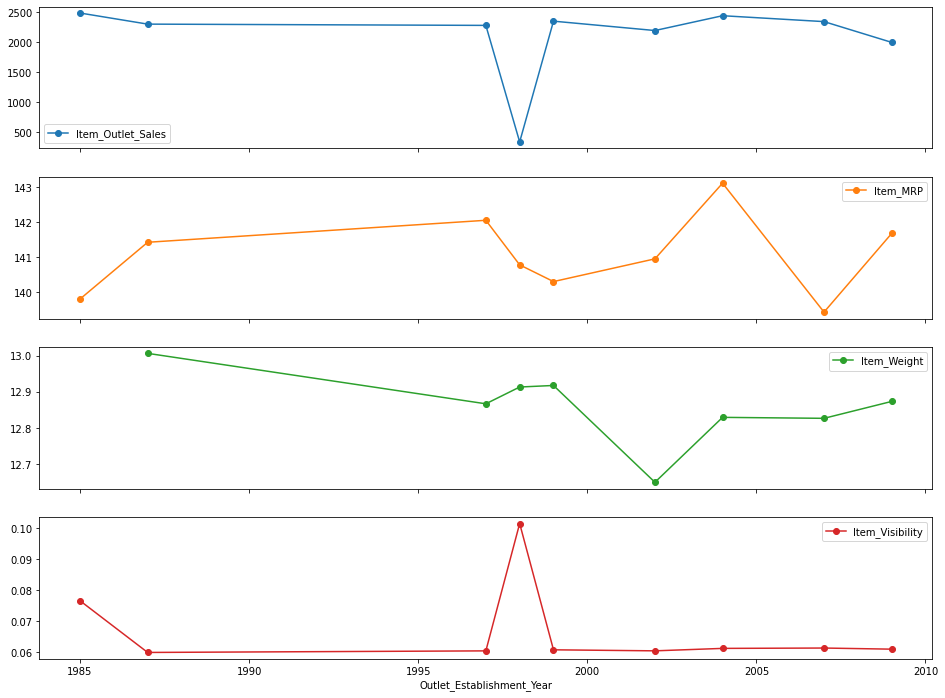

In [175]:
line_df = df.groupby('Outlet_Establishment_Year').mean()
line_df
line_df.plot(y=['Item_Outlet_Sales','Item_MRP','Item_Weight','Item_Visibility'], subplots=True, marker='o',figsize=(16,12));

Interestingly enough, Visibility and Sales present a very inverse relationship upon one another in hiwch the more Visiblity, the less sales have beem made throughout the year, while MRP has less of an impact 

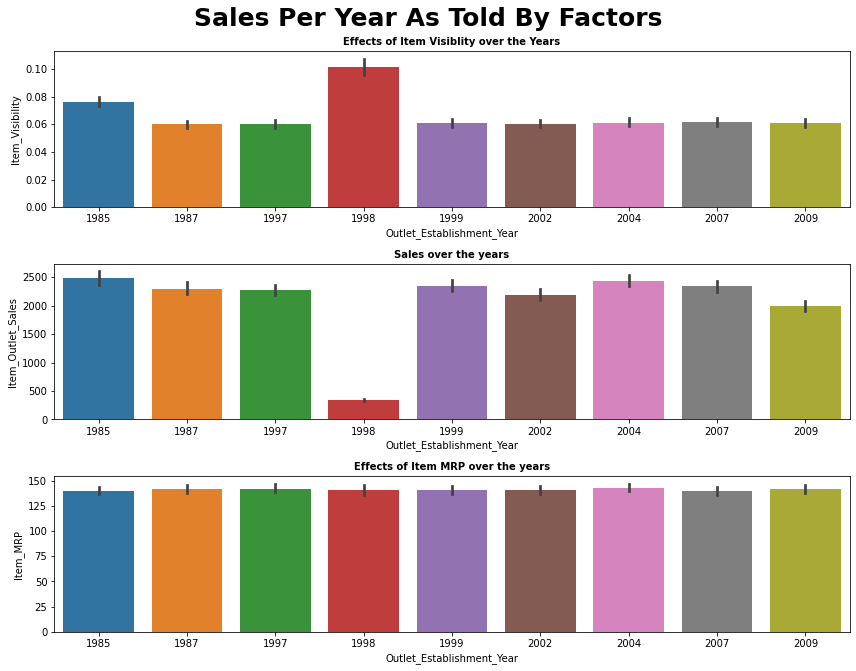

In [176]:
fig, axes = plt.subplots(nrows=3, figsize=(12,9))

# sns.barplot(data=df, x='Status', y='Life expectancy', ax=axes[0])
sns.barplot(data=df, x='Outlet_Establishment_Year', y='Item_Visibility', ax=axes[0])
axes[0].set_title('Effects of Item Visiblity over the Years', fontsize=10, fontweight='bold')

sns.barplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', ax=axes[1])
axes[1].set_title('Sales over the years', fontsize=10, fontweight='bold')

sns.barplot(data=df, x='Outlet_Establishment_Year', y='Item_MRP', ax=axes[2])
axes[2].set_title('Effects of Item MRP over the years', fontsize=10, fontweight='bold')

fig.suptitle('Sales Per Year As Told By Factors',fontsize=25,fontweight='bold', y=1.03)

fig.tight_layout()

It seems that greater Visibility may negatively impact sales whereas MRP is stable throughout the years and is not indicative on whether the year was successful, but it may the that the Visibility was increased as a response to low sales in 1998.

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np 
from sklearn import set_config
set_config(display='diagram')

In [178]:
df.duplicated().sum()
# No duplicates to remove in this instance

0

In [179]:
print(df.info(), '\n')
print(df.isna().sum())
# The dataset has two features in which missing values are found. One is Numerical and other is Categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

Item_Identifier                 0
Item

From what I see, the vast majority of missing values are in Item Weight and Outlet size. Interestingly enough, the Outlet Size and Location Types are Ordinal features as well as Outlet Type.

In [180]:
print(df['Outlet_Size'].value_counts(),'\n')
print(df['Outlet_Location_Type'].value_counts(),'\n')
print(df['Outlet_Type'].value_counts(),'\n')
print(df['Item_Fat_Content'].value_counts(),'\n')

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 



In [181]:
replacement_cat = {'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}
df['Item_Fat_Content'].replace(replacement_cat, inplace=True)
df['Item_Fat_Content'].value_counts()
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df['Outlet_Size']
replacement_dictionary = {'Tier 3':2, 'Tier 2':1, 'Tier 1':0}
df['Outlet_Location_Type'].replace(replacement_dictionary, inplace=True)
df['Outlet_Location_Type']
replacement_dictionary = {'Grocery Store':3, 'Supermarket Type3':2, 'Supermarket Type2':1, 'Supermarket Type1':0}
df['Outlet_Type'].replace(replacement_dictionary, inplace=True)
df['Outlet_Type']

0       0
1       1
2       0
3       3
4       0
       ..
8518    0
8519    0
8520    0
8521    1
8522    0
Name: Outlet_Type, Length: 8523, dtype: int64

In [182]:
df.drop(columns='Item_Identifier', axis=1, inplace=True)
# Considering how many unique values this column had, it would be burdesome to hot-encode them.
# Hence, to mediate the variance for this shipment, the column was decided to be dropped.

In [183]:
# In the previous notebook, the data was imputed prior to a datasplit using various methods. 
# In this instance, the data split would be done, and imputation will be performed after.
y = df['Item_Outlet_Sales']
X = df.drop(columns='Item_Outlet_Sales')

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [185]:
# I separate the selectors by the given dtype for imputation
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [186]:
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Mean was selected for the numerical values so as to mantain the decimal points for the numerical features

scale = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [187]:
num_pipeline = make_pipeline(mean_imputer, scale)
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [188]:
cat_pipeline = make_pipeline(freq_imputer, ohe)
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [189]:
num_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor
# This method is to fit in the imputers and the Scaler/Encoder so as to prepare for preprocessing.

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb643a398d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb643a39e50>)])

In [190]:
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [191]:
#After fitting the training data, we now proceed to check for any remaining missing values.
print(np.isnan(X_train_processed).sum().sum())
print(np.isnan(X_test_processed).sum().sum())

0
0


In [202]:
from sklearn.linear_model import LinearRegression
lin_reg_pipe = make_pipeline(preprocessor, LinearRegression())
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb643a398d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb643a39e50>)])),
                ('linearregression', LinearRegression())])

In [203]:
train_preds = lin_reg_pipe.predict(X_train)
test_preds = lin_reg_pipe.predict(X_test)
print(train_preds)
print(test_preds)

[3810.60904657 2654.67292606 2608.46156263 ... 3735.21294474 1930.19418524
 1536.25173551]
[1360.55910613  717.47568991  881.55087906 ... 3303.68786496 2028.61837123
 2460.80713775]


In [197]:
from sklearn.metrics import r2_score, mean_squared_error

In [204]:
r2_train = r2_score(y_train, train_preds)
print(r2_train)
r2_test = r2_score(y_test, test_preds)
print(r2_test)

0.5615551419174629
0.5671041872384912


In [205]:
rmse_train = np.sqrt(mean_squared_error(y_train,train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test,test_preds))
print(rmse_train)
print(rmse_test)

1139.1040937388918
1092.8630817241494


My issue with this is that the data presents a steady train set but testing set results in extreme overfitting that may be due to the complicated set of data that is presented in the dataset. As it stands, the r2 model is the best to use to determine the issues of bias that is present in the dataset.

In [206]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [230]:
dec_tree = make_pipeline(preprocessor, DecisionTreeRegressor(max_depth = 6, random_state = 42))
dec_tree.fit(X_train, y_train)
train_6_score = dec_tree.score(X_train, y_train)
test_6_score = dec_tree.score(X_test, y_test)
print(train_6_score)
print(test_6_score)
# Having tuned this, I have come to conclude that the dataset for this file
# may be flawed due to the limited amount of data and thus more stringent measures
# to enter the data correctly, if at all are recommended to remedy this issue
# for future usage. As it stands, the R2 model is the most workable for this exercise.

0.6151611782156408
0.5825043788609139
